In [4]:
import pandas as pd
covid_data = pd.read_csv('covid_data.csv')
vaccinations_data = pd.read_csv('country_vaccinations.csv')

vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] *100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] *100

covid_df.shape

(86785, 18)

Matplotlib не ограничивается только DataFrame: c помощью Matplotlib можно визуализировать любые последовательности (списки, словари, NumPy-массивы).  
За визуализацию графиков в Matplotlib отвечает модуль _pyplot_. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках используется команда _%matplotlib inline_.

При использовании тёмной темы в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

plt.style.use('default')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (_figure_, их ещё называют канвасами или холстами) и координатных плоскостей (_axes_, или системы координат).  
Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (_fig_), содержащий необходимую информацию и настройки, например размер в дюймах (_figsize_). К этому объекту с помощью метода _add_axes()_ добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат.

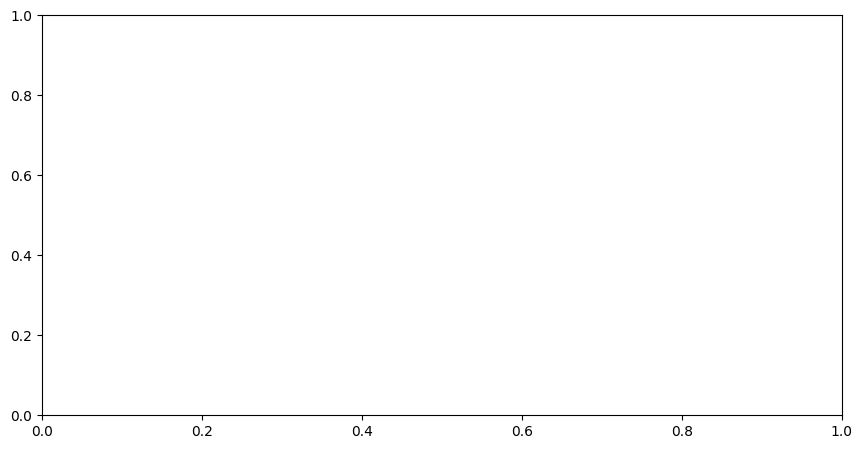

In [5]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])

Теперь на созданной системе координат мы можем построить график. У объекта координатной плоскости __axes__ вызовем метод __scatter()__.  
- _x, y_ — последовательности, которые будут отложены по осям абсцисс и ординат  
- _s_ — размер маркеров  
- _marker_ — вид маркеров ('o' — точки, '^' — треугольники)  
- _c_ — цвет маркеров

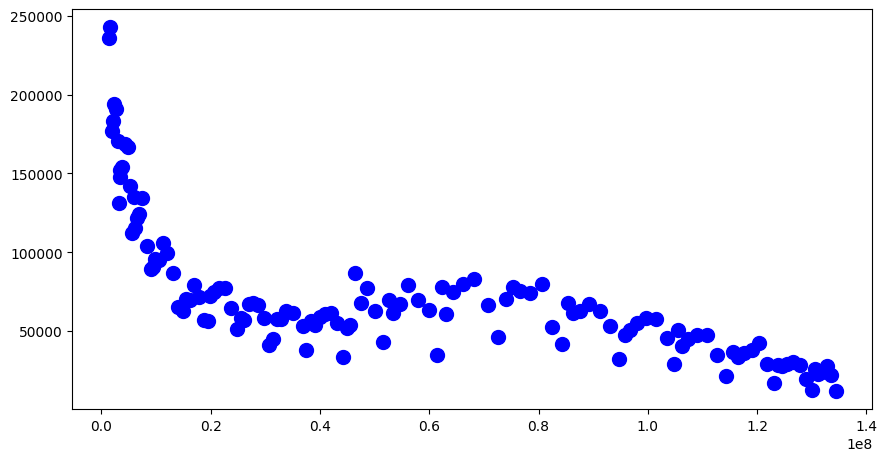

In [10]:
# Диаграмма рассеяния
# х - суммарное число вакцин
# у - ежедневный прирост заболевших
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.scatter(
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=100,
    marker='o',
    c='blue'
);

Для построения круговых диаграмм в Matplotlib используется метод __pie()__.
- _x_ — значения, по которым будет строиться круговая диаграмма  
- _labels_ — метки, соответствующие значениям  
- _autopct_ — формат отображения долей на диаграмме (например, '%.1f%%' означает, что округление будет производиться до первого знака после запятой и при выводе будет указан знак "%"; открывающий и закрывающий проценты означают форматирование, а внутренний — вывод знака "%")  
- _explode_ — последовательность, которая определяет долю смещения сектора от центра для каждого значения из x

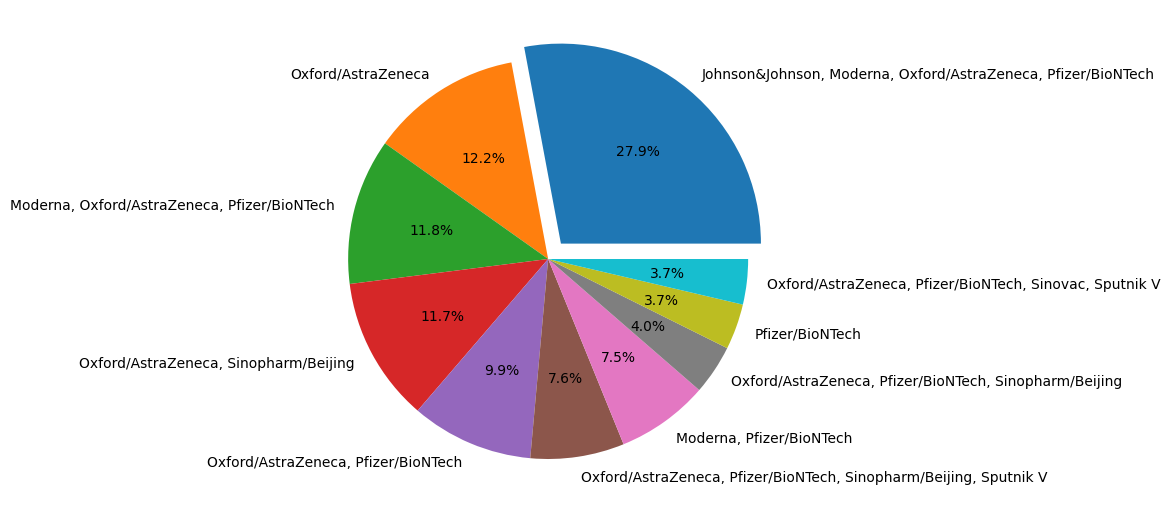

In [12]:
# Круговая диаграмма
# топ-10 комбинаций вакцин в мире
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%', # выводим 1 знак после .и знак %;по краям - форматирование
    explode=[0.1,0,0,0,0,0,0,0,0,0] # смещаем на 10% самую попуярную
);

**ДОБАВЛЕНИЕ ИНФОРМАТИВНОСТИ В ГРАФИКИ**

Управлять информативностью графика можно с помощью методов координатной плоскости axes:
- _axes.set_title()_ — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта)  
- _axes.set_xlabel()_ — название оси абсцисс  
- _axes.set_ylabel()_ — название оси ординат  
- _axes.set_xticks()_ — установка отметок на оси абсцисс  
- _axes.set_yticks()_ — установка отметок на оси ординат  
- _axes.xaxis.set_tick_params()_ — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах)  
- _axes.yaxis.set_tick_params()_ — управление параметрами отметок на оси ординат  
- _axes.legend()_ — отображение легенды  
- _axes.grid()_ — установка сетки

C:\Users\volod\AppData\Local\Temp\ipykernel_3084\2419694427.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china_grouped = china_data.groupby(['date'])['confirmed', 'active', 'deaths', 'recovered'].sum()


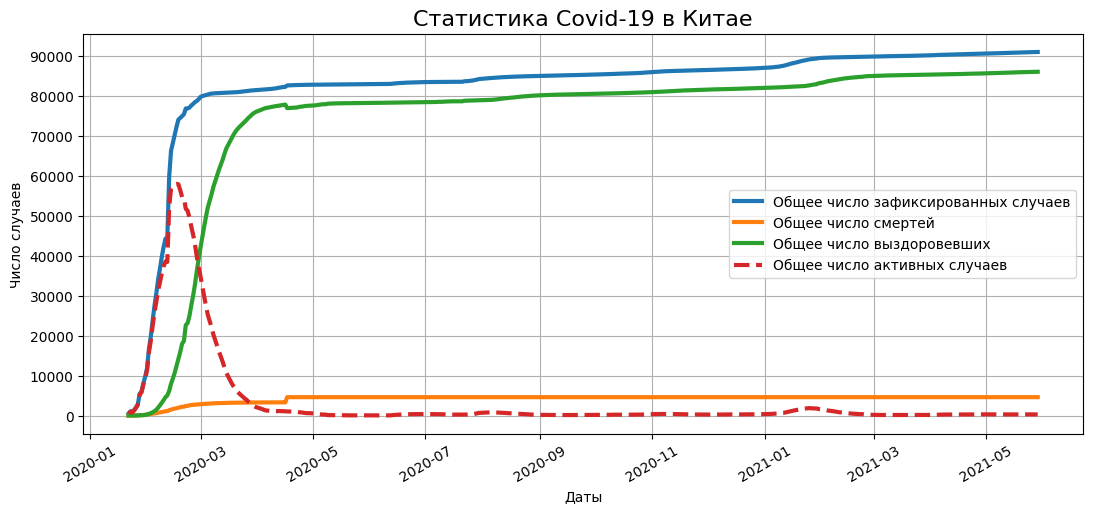

In [19]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])['confirmed', 'active', 'deaths', 'recovered'].sum()

# визуализация графиков
fig = plt.figure(figsize=(10,4)) # создание фигуры
axes = fig.add_axes([0,0,1,1]) # добавление координатной плоскости
# метод plot() создает линейные графики в MatPlotLib
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3,
          linestyle='dashed') # пунктирная линия

# установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16) # подпись графика
axes.set_xlabel('Даты') # подпись оси х
axes.set_ylabel('Число случаев') # подпись оси у
axes.set_yticks(range(0,100000, 10000)) # отметки на оси у
axes.xaxis.set_tick_params(rotation=30) # поворот поворот отметок
axes.grid() # добавление сетки
axes.legend(); # добавление легенды


**ИСПОЛЬЗОВАНИЕ НЕСКОЛЬКИХ СИСТЕМ КООРДИНАТ**

Для добавления второй системы координат необходимо повторно применить к объекту _fig_ метод _add_axes_, указав новое имя для второй системы координат.  
Для этого построим столбчатые диаграммы с помощью метода __bar()__.  
- _x_ — названия категорий, которые будут располагаться по оси абсцисс  
- _height_ — высота столбцов диаграммы, массив из показателей для визуализации (например, среднее, максимальное значение и т. д.)  
- _width_ — ширина столбцов диаграммы  
- _color_ — цвет.

ТОП-5 стран по общему числу привитых вторым компонентом людей, а также ТОП-5 стран по числу полностью привитых на 100 человек населения.  
Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода _last()_ и выбираем ТОП-5 стран с использованием метода _nlargest()_.  
При отображении графиков создаём две координатные плоскости _main_axes_ и _insert_axes_, на каждой из них отдельно строим столбчатые диаграммы.

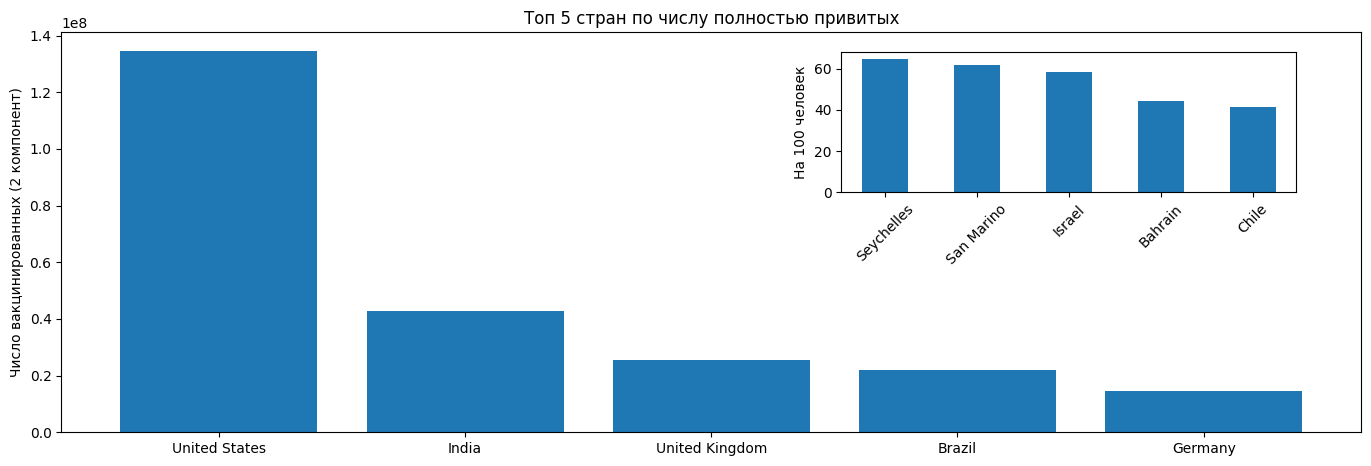

In [24]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

# визуализация главного графика
fig = plt.figure(figsize=(13,4))
main_axes = fig.add_axes([0,0,1,1])
main_axes.bar(x=vacc_country.index, height=vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых')

# визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.35, 0.35])
insert_axes.bar(x=vacc_country_per_hundred.index, height=vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

***SUBPLOTS***  
Создание дополнительных систем координат с помощью метода _add_axes()_ полезно, однако используется не так часто.  
В большинстве случаев для отображения нескольких систем координат используется функция __subplots()__. Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.
- _nrows_ — число строк  
- _ncols_ — число столбцов  
- _figsize_ — общий размер фигуры в дюймах (ширина и высота)

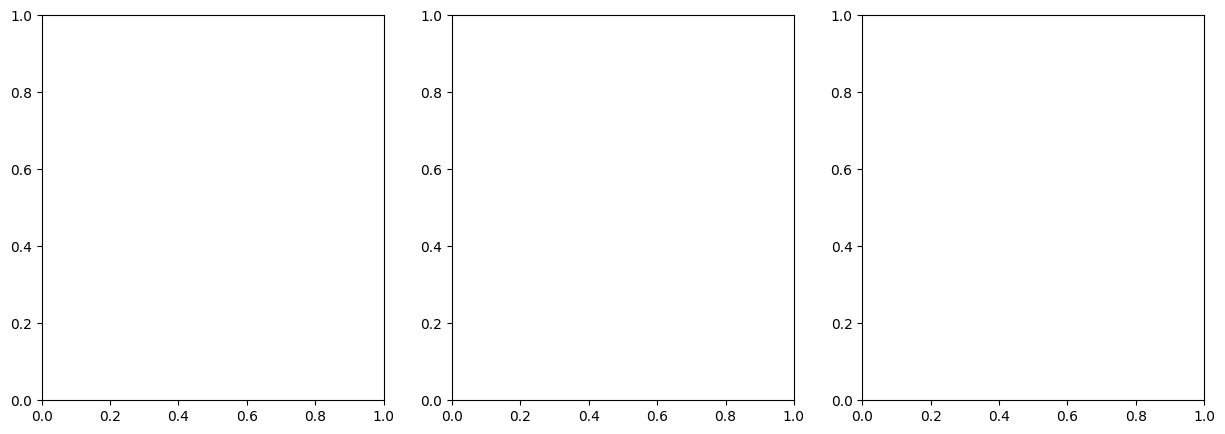

In [28]:
# создание 3х координатных плоскостей в виде таблицы
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

За построение гистограмм в библиотеке Matplotlib отвечает метод __hist()__.  
- _x_ — массив чисел, для которого строится гистограмма  
- _bins_ — число столбцов (корзин)  
- _orientation_ — ориентация гистограммы (по умолчанию 'vertical')  
- _color_ — цвет

Построим три графика:
1. Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
2. Линейный график изменения ежедневной заболеваемости в стране.
3. Гистограмму ежедневной заболеваемости в стране.

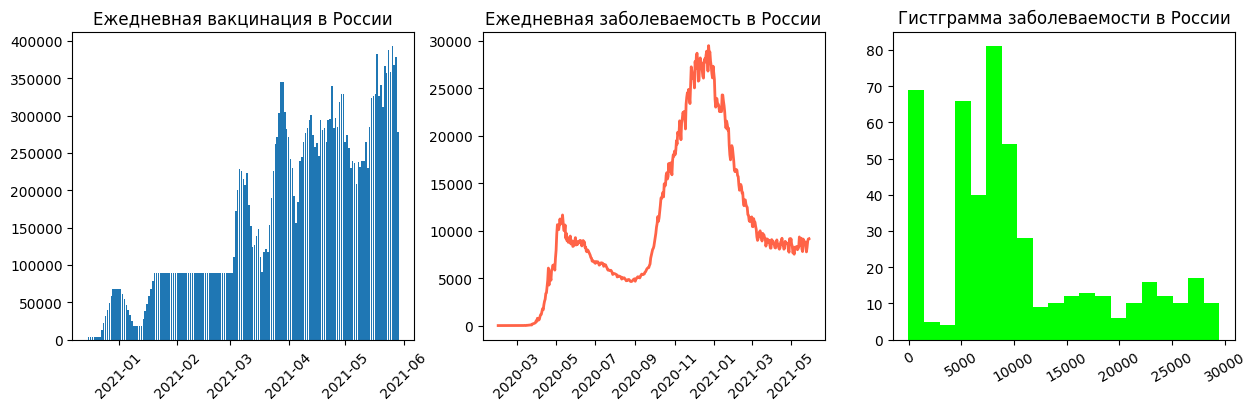

In [29]:
russia_data = covid_df[covid_df['country'] == 'Russia']

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data['date'],
    height=russia_data['daily_vaccinations'],
    label='Число вакцинированных'
)
axes[0].set_title('Ежедневная вакцинация в России')
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data['date'],
    russia_data['daily_confirmed'],
    label='Число заболевших',
    color='tomato',
    lw=2
)
axes[1].set_title('Ежедневная заболеваемость в России')
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data['daily_confirmed'],
    label=['Число заболевших'],
    color='lime',
    bins=20
)
axes[2].set_title('Гистграмма заболеваемости в России')
axes[2].xaxis.set_tick_params(rotation=30)